In [2]:
import pandas as pd
test_data = pd.read_csv('operate_american.csv')
test_data

,Aircraft,CabinFlown,CabinStaffService,DateFlown,FoodAndBeverages,GroundService,InflightEntertainment,Recommended,Route,SeatComfort,Textchunk,TypeOfTraveller,ValueForMoney,WifiAndConnectivity
0,E175,Economy Class,1.0,August 2018,1.0,1.0,1.0,no,Dallas Ft Worth to Missoula,1.0,| \r\r\nDallas Ft Worth to Missoula. 2 hours...,Business,1.0,1.0
1,NaN,Economy Class,1.0,July 2018,1.0,1.0,1.0,no,Phoenix to Honolulu,1.0,| Phoenix to Honolulu. The worst trip ever. ...,Solo Leisure,1.0,1.0
2,NaN,Premium Economy,3.0,August 2018,NaN,2.0,NaN,no,Philadelphia to Orlando,2.0,| \r\r\nPhiladelphia to Orlando. Worst trip ...,Couple Leisure,1.0,NaN
3,NaN,Economy Class,1.0,July 2018,1.0,1.0,1.0,no,Philadelphia to Manchester,1.0,| Philadelphia to Manchester. This airline c...,Couple Leisure,1.0,1.0
4,NaN,Economy Class,3.0,July 2018,1.0,1.0,1.0,no,Mazatlan to Dallas Ft Worth,2.0,| Mazatlan to Dallas Ft Worth. Horrible ser...,Solo Leisure,1.0,1.0
5,NaN,Economy Class,2.0,July 2018,NaN,3.0,NaN,no,Buffalo to Baltimore Washington via Philadelphia,1.0,| Buffalo to Philadelphia was fine. Not comf...,Solo Leisure,1.0,NaN
6,Boeing 787-9,Business Class,5.0,July 2018,4.0,5.0,5.0,yes,Tokyo Narita to Los Angeles,5.0,| Tokyo Narita to Los Angeles. First time ex...,Solo Leisure,4.0,2.0
7,NaN,Economy Class,1.0,July 2018,1.0,1.0,1.0,no,Laguardia to Chicago Ohare,1.0,| Laguardia to Chicago Ohare. Horrible exper...,Couple Leisure,1.0,1.0
8,Boeing 787-9,Economy Class,1.0,July 2018,2.0,2.0,3.0,no,Shanghai to West Palm Beach via Dallas Ft Worth,1.0,| Shanghai to West Palm Beach via Dallas Ft ...,Business,1.0,1.0
9,NaN,Economy Class,3.0,July 2018,NaN,1.0,NaN,no,Wichita to Lexington via Chicago,1.0,| Wichita to Lexington via Chicago. First fl...,Solo Leisure,1.0,NaN


In [3]:
test_text = ' '.join(list(test_data.loc[test_data['Recommended'] == 'yes','Textchunk']))
test_text

' |  Tokyo Narita to Los Angeles. First time experience with this airline on an international route. Both flights on time. Aircraft and restrooms clean. Staff was very professional and proactive on both trips. Tons of entertainment. The food won\'t be giving Emirates a run for its money anytime soon, but sometimes just a hot, simple meal is nice. Wifi goes from good to slow to good - maybe not worth the money. Would certainly choose them again. Is this really the same airline that seems to be getting all of these negative reviews?  |  Chicago to Shanghai. Started out at the AA Lounge on Floor Two of the Admiral\'s Club, which is actually a Flagship Lounge. I did not expect much for a US carriers premium club, but was gladly surprised. Many hot Breakfast items, cold as well along with a host of other assorted goodies. Definitely worth a visit. You only need you boarding pass to show to the desk agent, to gain access. Must be a Business Class member or Ex Plat. Boarded early. Yes, an ann

In [4]:
#convert scentences to words
import re
import nltk
test_text = re.sub('[.:\',\-!;"()?”’|]',"", test_text)
test_tokens = nltk.word_tokenize(test_text)
test_tokens = list(map(lambda x: x.lower(), test_tokens))

test_tagged = nltk.pos_tag(test_tokens, tagset='universal')

meaning_collector = []
for i in test_tagged:
    if i[1] == 'NOUN':
        meaning_collector.append((i[0],'n'))
    elif i[1] == 'VERB':
        meaning_collector.append((i[0],'v'))
    elif i[1] == 'ADJ':
        meaning_collector.append((i[0],'a'))
    else:
        pass

nouns = []
verbs = []
adjectives = []
for i in meaning_collector:
    if i[1] == 'n':
        nouns.append(i)
    elif i[1] == 'v':
        verbs.append(i)
    elif i[1] == 'a':
        adjectives.append(i)
    else:
        pass

lmtz = nltk.stem.WordNetLemmatizer()
lmtzd_nouns = list(map(lambda x: lmtz.lemmatize(x[0], str(x[1])), nouns))
lmtzd_verbs = list(map(lambda x: lmtz.lemmatize(x[0], str(x[1])), verbs))
lmtzd_adjectives = list(map(lambda x: lmtz.lemmatize(x[0], str(x[1])), adjectives))

#stm = nltk.stem.PorterStemmer()
#[stemmer.stem(word) for word in meaning_collector3]

In [5]:
joined_noun = ' '.join(lmtzd_nouns)
joined_verb = ' '.join(lmtzd_verbs)
joined_adjective = ' '.join(lmtzd_adjectives)

from wordcloud import WordCloud

# Read the whole text.
text = joined_noun

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("nouns.png")

<Figure size 2000x1000 with 1 Axes>

In [461]:
text = joined_verb
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
plt.figure(figsize=(20,10), dpi = 1500)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("verbs.png")

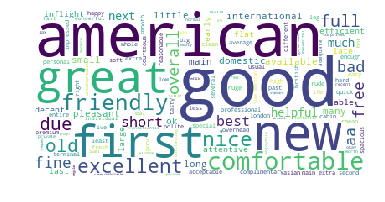

In [20]:
text = joined_adjective
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=80, relative_scaling=.5).generate(text)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word4.png", dpi=1200)